<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Correlation-of-Features" data-toc-modified-id="Correlation-of-Features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correlation of Features</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#K-Nearest-Neighbor" data-toc-modified-id="K-Nearest-Neighbor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>K Nearest Neighbor</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Final Model</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Model-Performance" data-toc-modified-id="Model-Performance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Performance</a></span></li><li><span><a href="#ML-Pipeline" data-toc-modified-id="ML-Pipeline-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>ML Pipeline</a></span></li></ul></li></ul></div>

# Business Understanding

# Data Understanding

In [1]:
import pandas as pd

df = pd.read_csv('data/travel_insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [3]:
na_cols = df.loc[df.isnull().any(axis=1),
                          df.columns[df.isnull().any()]].columns
na_cols

Index(['Gender'], dtype='object')

# Data Preparation

In [4]:
print(df.Gender.value_counts())
print(df.Gender.isna().sum())

M    9347
F    8872
Name: Gender, dtype: int64
45107


In [5]:
df_mod = df.drop('Gender',axis=1)
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


Before moving on, it is best to adjust the column names and substitute spaces with `_` and have all columns in lower cases for good measure. In addition, one column has a bracket, which can also lead to an inconvenience. The following code block handles those issue. 

In [6]:
df_mod.columns = [s[:s.find('(')] if '(' in s else s for s in df_mod.columns]
df_mod.columns = ['_'.join(s.lower().split()) for s in df_mod.columns]
df_mod.columns

Index(['agency', 'agency_type', 'distribution_channel', 'product_name',
       'claim', 'duration', 'destination', 'net_sales', 'commision', 'age'],
      dtype='object')

In [7]:
'''Visualization stage here!'''

'Visualization stage here!'

In order to proceed to the next step, we need to visualize the data in each column first. 

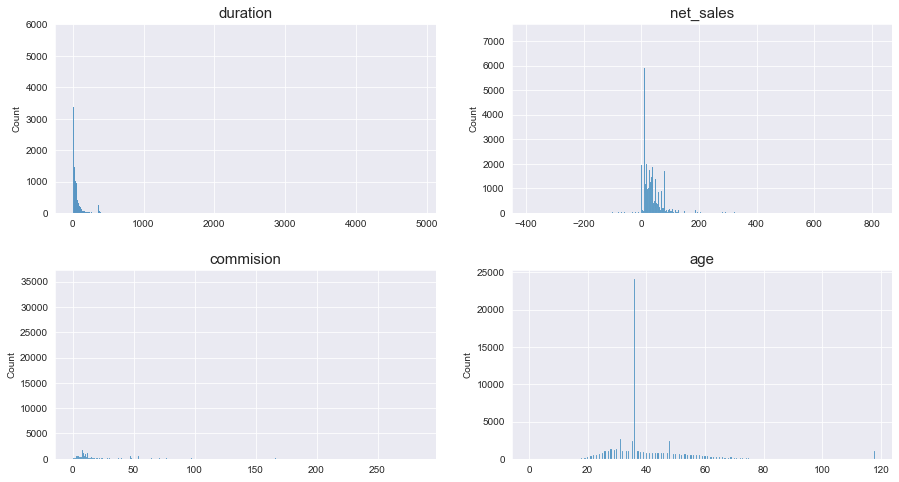

In [8]:
# Import matplotlib and seaborn 
import matplotlib.pyplot as plt
import seaborn as sns 

# Enable inline ploting
%matplotlib inline 

# Set seaborn style 
sns.set_style('darkgrid')

# Select numeric columns from the dataframe 
numerics = ['int64', 'float64']
num_cols = df_mod.select_dtypes(include=numerics).columns

# Plot the distribution of numeric columns
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
for ax, col in zip(axes.flatten(),num_cols):
    sns.histplot(df_mod[col], 
                 color='tab:blue',ax=ax).set_title(col,fontsize=15)
    # Hide xlabel
    ax.set_xlabel('')

# Adjust vertical spacing between subplots 
plt.subplots_adjust(hspace = 0.3);

# Save plot
#plt.savefig('images/features_hist.png')

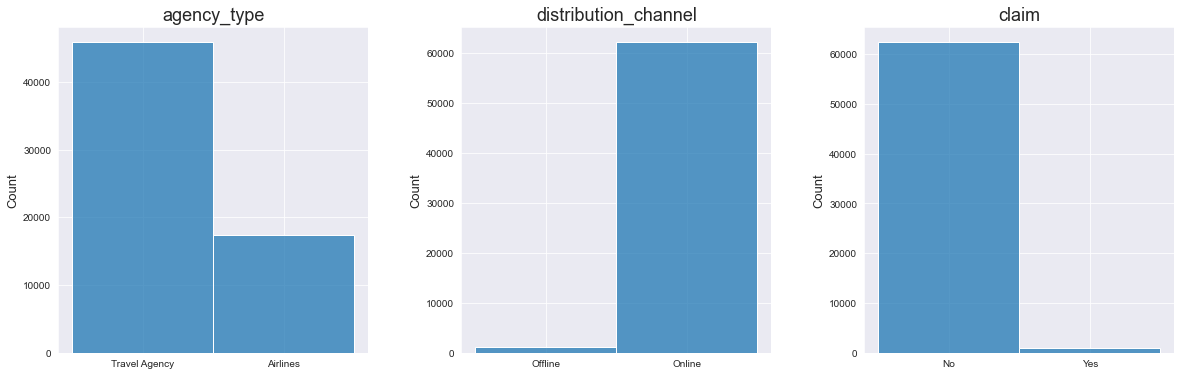

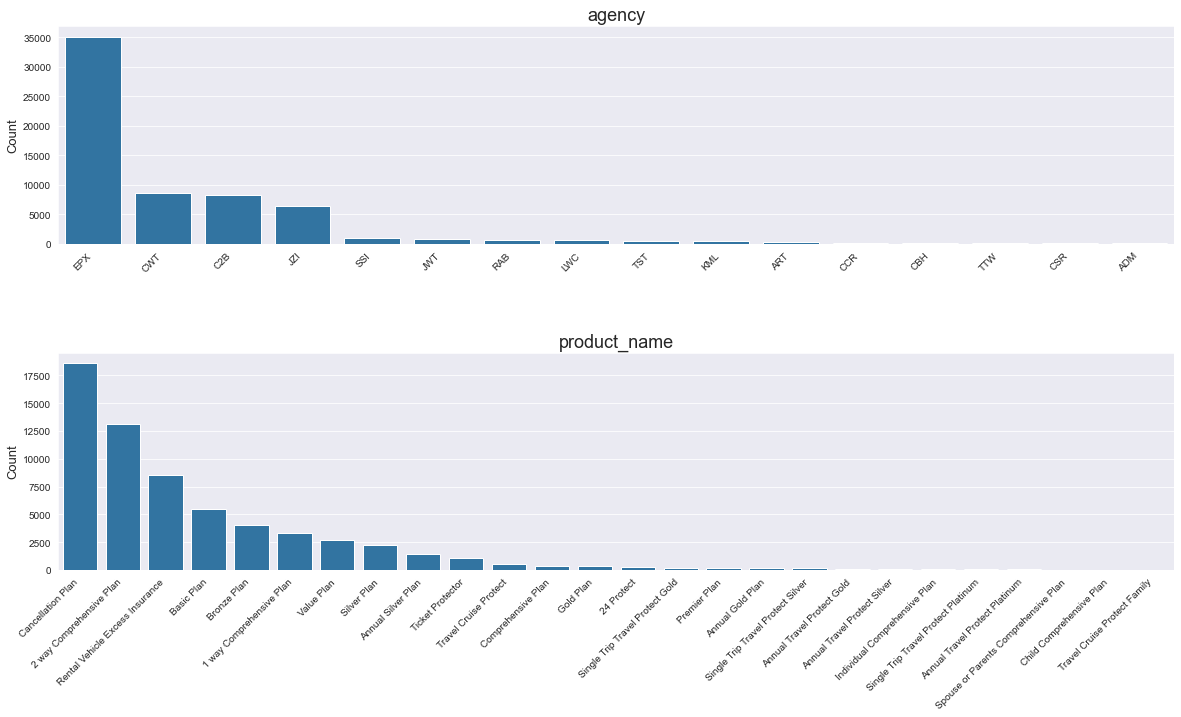

In [15]:
# Select catagorical columns from the dataframe 
binary_cat_cols = ['agency_type', 'distribution_channel', 'claim']
cat_cols = [col for col in df_mod.columns if col not in num_cols]

# Plot the distribution of numeric columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
for ax, col in zip(axes.flatten(), binary_cat_cols):
    g = sns.histplot(df_mod[col], ax=ax, color='tab:blue')
        
    # Set title and font size 
    g.set_title(col, fontsize=18)
    g.set_xlabel('')
    g.set_ylabel('Count',fontsize=13)
    #print(g.get_xticks())
    # Rotate xtick labels for readability
    #print(s_plt.get_xmajorticklabels())
    #s_plt.set_xticklabels(s_plt.get_xticklabels(), rotation=30)    
    #g.set_xticklabels(g.get_xticklabels(), rotation=90, 
    #                     horizontalalignment='right')
plt.subplots_adjust(wspace = 0.3);    
non_bin_cat_cols = [col for col in cat_cols if col not in binary_cat_cols]
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
for ax, col in zip(axes.flatten(), non_bin_cat_cols):
    tmp_df = df_mod[col].value_counts()
    tmp_df = pd.DataFrame(tmp_df).reset_index()
    tmp_df.columns = [col, 'Count']
    g = sns.barplot(x=col, y='Count',data=tmp_df, ax=ax, color='tab:blue')
        
    # Set title and font size 
    g.set_title(col, fontsize=18)
    g.set_xlabel('')
    g.set_ylabel('Count',fontsize=13)
    g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
# Adjust vertical spacing between subplots 
#plt.hist()
#
plt.subplots_adjust(hspace = 0.5);
# Save plot
#plt.savefig('images/features_hist.png')

In [9]:
destin = df_mod.destination.value_counts()
destin = pd.DataFrame(destin).reset_index()
destin.columns = ['Country','frequency']
destin.Country = destin.Country.apply(lambda x: x.title())
destin.head()

,Country,frequency
0,Singapore,13255
1,Malaysia,5930
2,Thailand,5894
3,China,4796
4,Australia,3694


In [12]:
import plotly.express as px

fig = px.choropleth(destin.iloc[1:,:], locations="Country", 
                    locationmode="country names", color='frequency',                    
                    color_continuous_scale="algae",
                    labels={'frequency':'Frequency'}, 
                    projection="natural earth"                    
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

## Correlation of Features

In [ ]:
df_mod.claim.value_counts()

In [ ]:
df_mod.claim = (df_mod.claim=='Yes').astype(int)

In [ ]:
df_dummy = pd.get_dummies(df_mod,drop_first=True)
df_dummy.shape

In [ ]:
X = df_dummy.drop('claim', axis=1)
y = df.Claim

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
y_train.value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

In [ ]:
y_train_resampled.value_counts()

# Modeling

## Logistic Regression 

## K Nearest Neighbor

## Support Vector Machine

## Decision Tree

## Random Forest

## XGBoost 

## Grid Search 

## Final Model

# Evaluation

## Model Performance

## ML Pipeline